(Text(0.5, 1.0, 'Magnitude Spectrum'), ([], []), ([], []))

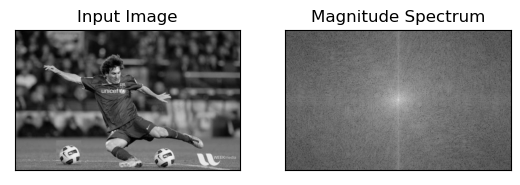

In [9]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
img = cv.imread('messi5.jpg', cv.IMREAD_GRAYSCALE)
assert img is not None, "file could not be read, check with os.path.exists()"
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)
magnitude_spectrum = 20*np.log(np.abs(fshift))
plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])

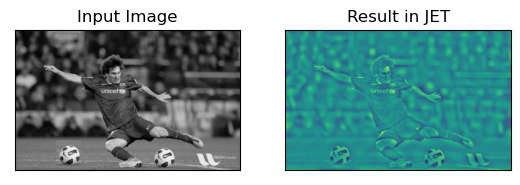

In [11]:
rows, cols = img.shape
crow,ccol = rows//2 , cols//2
fshift[crow-10:crow+11, ccol-10:ccol+11] = 0
f_ishift = np.fft.ifftshift(fshift)
img_back = np.fft.ifft2(f_ishift)
img_back = np.real(img_back)
plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
# plt.subplot(132),plt.imshow(img_back, cmap = 'gray')
# plt.title('Image after HPF'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img_back)
plt.title('Result in JET'), plt.xticks([]), plt.yticks([])
plt.show()

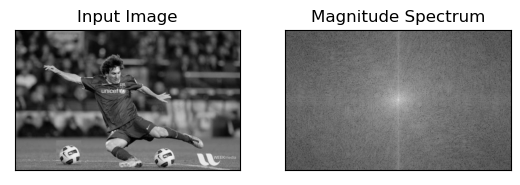

In [25]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
img = cv.imread('messi5.jpg', cv.IMREAD_GRAYSCALE)
assert img is not None, "file could not be read, check with os.path.exists()"
dft = cv.dft(np.float32(img),flags = cv.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)
magnitude_spectrum = 20*np.log(cv.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))
plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

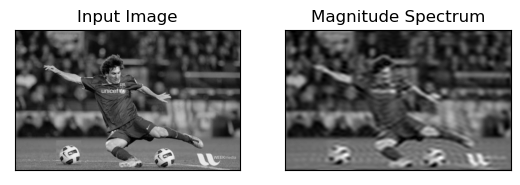

In [16]:
rows, cols = img.shape
crow,ccol = rows//2 , cols//2
# create a mask first, center square is 1, remaining all zeros
mask = np.zeros((rows,cols,2),np.uint8)
mask[crow-30:crow+30, ccol-30:ccol+30] = 1
# apply mask and inverse DFT
fshift = dft_shift*mask
f_ishift = np.fft.ifftshift(fshift)
img_back = cv.idft(f_ishift)
img_back = cv.magnitude(img_back[:,:,0],img_back[:,:,1])
plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img_back, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

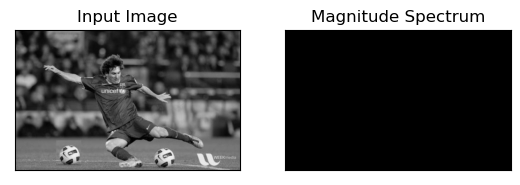

In [26]:
rows, cols = img.shape
crow,ccol = rows//2 , cols//2
# create a mask first, center square is 1, remaining all zeros
# mask = np.zeros((rows,cols,2),np.uint8)
# mask[crow-30:crow+30, ccol-30:ccol+30] = 1
# # apply mask and inverse DFT
# fshift = dft_shift*mask
fshift[crow-30:crow+31, ccol-30:ccol+31] = 0
f_ishift = np.fft.ifftshift(fshift)
img_back = cv.idft(f_ishift)
img_back = cv.magnitude(img_back[:,:,0],img_back[:,:,1])
plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img_back, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

In [27]:
>>> import cv2 as cv
>>> flags = [i for i in dir(cv) if i.startswith('COLOR_')]
>>> print( flags )

['COLOR_BAYER_BG2BGR', 'COLOR_BAYER_BG2BGRA', 'COLOR_BAYER_BG2BGR_EA', 'COLOR_BAYER_BG2BGR_VNG', 'COLOR_BAYER_BG2GRAY', 'COLOR_BAYER_BG2RGB', 'COLOR_BAYER_BG2RGBA', 'COLOR_BAYER_BG2RGB_EA', 'COLOR_BAYER_BG2RGB_VNG', 'COLOR_BAYER_BGGR2BGR', 'COLOR_BAYER_BGGR2BGRA', 'COLOR_BAYER_BGGR2BGR_EA', 'COLOR_BAYER_BGGR2BGR_VNG', 'COLOR_BAYER_BGGR2GRAY', 'COLOR_BAYER_BGGR2RGB', 'COLOR_BAYER_BGGR2RGBA', 'COLOR_BAYER_BGGR2RGB_EA', 'COLOR_BAYER_BGGR2RGB_VNG', 'COLOR_BAYER_GB2BGR', 'COLOR_BAYER_GB2BGRA', 'COLOR_BAYER_GB2BGR_EA', 'COLOR_BAYER_GB2BGR_VNG', 'COLOR_BAYER_GB2GRAY', 'COLOR_BAYER_GB2RGB', 'COLOR_BAYER_GB2RGBA', 'COLOR_BAYER_GB2RGB_EA', 'COLOR_BAYER_GB2RGB_VNG', 'COLOR_BAYER_GBRG2BGR', 'COLOR_BAYER_GBRG2BGRA', 'COLOR_BAYER_GBRG2BGR_EA', 'COLOR_BAYER_GBRG2BGR_VNG', 'COLOR_BAYER_GBRG2GRAY', 'COLOR_BAYER_GBRG2RGB', 'COLOR_BAYER_GBRG2RGBA', 'COLOR_BAYER_GBRG2RGB_EA', 'COLOR_BAYER_GBRG2RGB_VNG', 'COLOR_BAYER_GR2BGR', 'COLOR_BAYER_GR2BGRA', 'COLOR_BAYER_GR2BGR_EA', 'COLOR_BAYER_GR2BGR_VNG', 'COLOR_

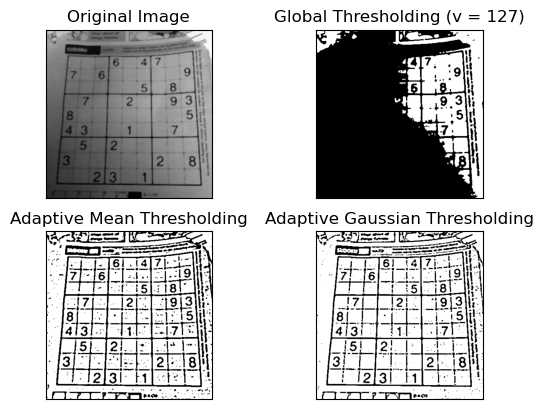

In [29]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
img = cv.imread('sudoku.jpg', cv.IMREAD_GRAYSCALE)
assert img is not None, "file could not be read, check with os.path.exists()"
img = cv.medianBlur(img,5)
ret,th1 = cv.threshold(img,127,255,cv.THRESH_BINARY)
th2 = cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_MEAN_C,\
            cv.THRESH_BINARY,11,2)
th3 = cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv.THRESH_BINARY,11,2)
titles = ['Original Image', 'Global Thresholding (v = 127)',
            'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [img, th1, th2, th3]
for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

In [30]:
import pandas as pd

# From a dictionary
data = {'Name': ['Tom', 'Jack'], 'Age': [28, 34]}
df = pd.DataFrame(data)

# From a list of dicts
data = [{'a': 1, 'b': 2}, {'a': 5, 'b': 10, 'c': 20}]
df = pd.DataFrame(data)

# From a NumPy array
import numpy as np
arr = np.array([[1, 2], [3, 4]])
df = pd.DataFrame(arr, columns=['A', 'B'])


In [33]:
# From a list of dicts
data = [{'a': 1, 'b': 2}, {'a': 5, 'b': 10, 'c': 20}]
df = pd.DataFrame(data)
df

,a,b,c
0,1,2,NaN
1,5,10,20.0


In [34]:
data = {'Name': ['Tom', 'Jack'], 'Age': [28, 34]}
df = pd.DataFrame(data)
df

,Name,Age
0,Tom,28
1,Jack,34


In [36]:
df[df["Age"]>30][["Name"]]

,Name
1,Jack


In [40]:
type(df["Age"]>30)

pandas.core.series.Series

In [51]:
# From a NumPy array
# import numpy as np
arr = [[1, -1,2], [3,-3, 4],[9,8,7]]
df = pd.DataFrame(arr, columns=['A', 'B','d'],index=['A','B','c'])

In [52]:
df

,A,B,d
A,1,-1,2
B,3,-3,4
c,9,8,7


In [53]:
df.loc[['A','B']]

,A,B,d
A,1,-1,2
B,3,-3,4


In [54]:
df.iloc[[0,1],0]

A    1
B    3
Name: A, dtype: int64

In [63]:
df.iloc[:2].iloc[:,[2]]

,d
A,2
B,4


In [64]:
df.iloc[:2,[2]]

,d
A,2
B,4


In [71]:
list(df.iloc[:2,[2]]['d'])

[2, 4]

In [72]:
`df.iloc[[0,

SyntaxError: invalid syntax (1039148520.py, line 1)